# I Projekt ZMUM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import category_encoders as ce

Pomysły:
* podział kategorycznych na koszyki (pewnie losowo)
* binary encoding, target encoding
* feature selection

## 1. Wczytanie danych

In [2]:
train_df = pd.read_csv("train.txt", sep = " ").sort_index()
test_df = pd.read_csv("testx.txt", sep = " ").sort_index()

Co chcę sprawdzić:
* usunięcie pustych kolumn
* powtarzanie sie kolumn (identyczne kolumny)
* zależność kolumn
* czy to, że zmienna ma wartość wpływa na liczność tam 1?

### Example commands

---

In [ ]:
train_df.dtypes

In [ ]:
train_df.iloc[:, 0].value_counts(dropna=False)

In [ ]:
train_df.loc[:, "Var228"].value_counts(dropna=False)

One hot encoding on some column

In [ ]:
train_df.loc[:, "Var201"].value_counts(dropna=False)

In [ ]:
pd.get_dummies(train_df, columns=["Var201"], dummy_na=False, drop_first=False, sparse=True).head()

In [ ]:
train_df["Var229"].nunique(dropna=True)

---

### Usunięcie kolumn pustych

In [3]:
train_df.describe()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var184,Var185,Var186,Var187,Var188,Var189,Var190,Var209,Var230,class
count,569.000000,969.000000,968.000000,1262.000000,1.203000e+03,35603.000000,35591.000000,0.0,569.000000,1.203000e+03,...,969.000000,0.0,569.000000,569.000000,969.000000,16884.000000,266.000000,0.0,0.0,40000.000000
mean,10.896309,0.005160,461.135331,0.114105,2.434816e+05,1314.888549,6.812368,NaN,47.546573,3.803626e+05,...,7.925697,NaN,3.100176,16.333919,168.028483,270.198650,22923.445602,NaN,NaN,0.073275
std,35.031447,0.160623,4605.849904,1.287273,6.485677e+05,2550.287869,6.334275,NaN,147.704543,8.746956e+05,...,35.727542,NaN,8.181404,55.322940,114.190795,86.545162,30864.349212,NaN,NaN,0.260591
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,NaN,0.000000,0.000000e+00,...,0.000000,NaN,0.000000,0.000000,0.000000,6.000000,0.000000,NaN,NaN,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,518.000000,0.000000,NaN,2.000000,0.000000e+00,...,0.000000,NaN,0.000000,0.000000,19.380000,204.000000,2809.507500,NaN,NaN,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,854.000000,7.000000,NaN,18.000000,0.000000e+00,...,0.000000,NaN,0.000000,4.000000,199.860000,270.000000,12756.465000,NaN,NaN,0.000000
75%,8.000000,0.000000,0.000000,0.000000,1.209000e+05,1428.000000,7.000000,NaN,46.000000,2.565675e+05,...,8.000000,NaN,0.000000,14.000000,256.680000,324.000000,32008.747500,NaN,NaN,0.000000
max,536.000000,5.000000,130668.000000,27.000000,6.048550e+06,131761.000000,140.000000,NaN,2300.000000,6.704406e+06,...,1000.000000,NaN,78.000000,910.000000,628.620000,642.000000,230427.000000,NaN,NaN,1.000000


In [4]:
def check_columns_empty(df):
    columns_to_drop =[]
    for column in df.columns:
        if df[column].isna().all():
            columns_to_drop.append(column)
    if columns_to_drop:
        df.drop(columns=columns_to_drop, inplace=True)

In [5]:
check_columns_empty(train_df)

In [6]:
train_df.shape

(40000, 213)

---

### Takie same kolumny

In [7]:
import sklearn.metrics

In [8]:
from collections import defaultdict

def inspect_categorical_columns(X):
    columns_to_encoding = []
    num_unique_values_map = defaultdict(list)
    for i in range(0, X.shape[1]):
        column = X.iloc[:, i]
        if column.dtype == (object or np.str):
            num_unique = column.nunique(dropna=False)
            print(str(column.name) + ": " + str(num_unique))
            columns_to_encoding.append(column.name)
            num_unique_values_map[num_unique].append(column.name)
    return columns_to_encoding, num_unique_values_map

Liczba unikalnych kategorii w poszczególnych kolumnach

In [9]:
columns_to_encoding, num_unique_values_map = inspect_categorical_columns(train_df)

Var191: 2
Var192: 352
Var193: 51
Var194: 4
Var195: 23
Var196: 3
Var197: 214
Var198: 3876
Var199: 4384
Var200: 13331
Var201: 3
Var202: 5553
Var203: 6
Var204: 100
Var205: 4
Var206: 22
Var207: 14
Var208: 3
Var210: 6
Var211: 2
Var212: 80
Var213: 2
Var214: 13331
Var215: 2
Var216: 1834
Var217: 12495
Var218: 3
Var219: 23
Var220: 3876
Var221: 7
Var222: 3876
Var223: 5
Var224: 2
Var225: 4
Var226: 23
Var227: 7
Var228: 30
Var229: 5


Być może zmienne które mają taką samą liczbę kategorii są identyczne

In [10]:
num_unique_values_map

defaultdict(list,
            {2: ['Var191', 'Var211', 'Var213', 'Var215', 'Var224'],
             352: ['Var192'],
             51: ['Var193'],
             4: ['Var194', 'Var205', 'Var225'],
             23: ['Var195', 'Var219', 'Var226'],
             3: ['Var196', 'Var201', 'Var208', 'Var218'],
             214: ['Var197'],
             3876: ['Var198', 'Var220', 'Var222'],
             4384: ['Var199'],
             13331: ['Var200', 'Var214'],
             5553: ['Var202'],
             6: ['Var203', 'Var210'],
             100: ['Var204'],
             22: ['Var206'],
             14: ['Var207'],
             80: ['Var212'],
             1834: ['Var216'],
             12495: ['Var217'],
             7: ['Var221', 'Var227'],
             5: ['Var223', 'Var229'],
             30: ['Var228']})

In [11]:
# dla 3876, 13331
columns_to_check = num_unique_values_map[2][0:3]
encoder = ce.OrdinalEncoder()
encoder.fit(train_df[columns_to_check])
predicted = encoder.transform(train_df[columns_to_check])

In [12]:
import sklearn.metrics
sklearn.metrics.accuracy_score(predicted.iloc[:, 0], predicted.iloc[:, 1])

0.801875

In [13]:
sklearn.metrics.accuracy_score(predicted["Var203"], predicted["Var210"])

KeyError: 'Var203'

In [14]:
train_df.drop(columns=["Var214", "Var220", "Var222"], inplace=True)

In [15]:
train_df.shape

(40000, 210)

---

### Popatrz na kolumny z wielką liczbą kategorii

In [15]:
train_df.loc[:, "Var202"].value_counts(dropna=False)

nyZz    165
VNjO    115
85IW    112
rlx_    109
o5H_     94
Mx5G     94
gMVu     93
xklU     87
8FB6     86
0xFv     83
dZaM     79
kWfE     72
kVZt     69
RTc9     69
zs8x     69
JM2c     68
gpsI     67
eKTQ     67
gif5     67
kKp4     64
93co     64
1qtb     63
bqg3     63
3Ivc     62
ZHYH     60
P9KQ     59
Phiv     59
Bp6l     58
EOBC     57
Ef1y     56
       ... 
M61y      1
BTdE      1
xybR      1
T0Ie      1
_FlF      1
BtDz      1
1DAD      1
WQdw      1
Bu7n      1
j7Xz      1
qDJF      1
N_wC      1
9AOt      1
t7pk      1
gdg1      1
nOgy      1
A0gQ      1
Qgzr      1
3m7b      1
9ryy      1
xWjQ      1
8_BH      1
yXJO      1
4A13      1
yaHQ      1
tJPt      1
eiMV      1
HAjw      1
UGSv      1
NaN       1
Name: Var202, Length: 5553, dtype: int64

Var202
1      891
2      763
3      686
4      542
5      433
6      346
7      247
8      234
9      199
10     154
11     130
12     112
13      93
14      93
15      68
16      59
17      44
18      48
19      32
20      40
21      23
22      31
23      26
24      18
25      17
26      11
27      20
28      20
29      13
30      10
      ... 
48       3
49       2
50       3
51       2
52       2
53       3
54       6
55       1
56       3
57       1
58       1
59       2
60       1
62       1
63       2
64       2
67       3
68       1
69       3
72       1
79       1
83       1
86       1
87       1
93       1
94       2
109      1
112      1
115      1
165      1
Length: 77, dtype: int64

In [17]:
train_df.loc[:, "Var200"].value_counts(dropna=False)

NaN        20291
yP09M03       53
Ipi9M03       39
Uw6SDm8       39
EvCZGt8       28
MF5S0rA       27
b1M9M03       18
NvI9wLk       18
5YIkUea       17
Uw6kiXL       16
gWmZGt8       16
Uw69wLk       13
n6_SDm8       13
G6OkUea       12
FTPSDm8       11
DlIkiXL       11
7aLZlRR       11
MF59M03       10
jCr9wLk       10
qRz9wLk        9
y_CbGd4        8
jhozGhg        8
qXbuwoT        8
QK29wLk        8
NdsZGt8        8
DlISDm8        8
nFLwctm        8
5Ox9M03        8
MF5ZlRR        8
NDkZGt8        8
           ...  
jhozjko        1
hBuJSDm        1
MivFXc7        1
VZjcM_N        1
iwX39RL        1
60PLzxT        1
v4ZHeY1        1
6GteKqV        1
gWm9jqm        1
pj87CdY        1
7FDw2dc        1
yP0BuSA        1
_eL4uLv        1
LQXp7IY        1
8VGiYr0        1
yN1pOsN        1
jCrKkrL        1
iwXA7Cc        1
MZXe19F        1
bqD6Q9n        1
8VGjxKS        1
cn3le73        1
Fj8Ixkv        1
pNuwj7r        1
n6_9wJ1        1
IoVFg25        1
97wvxXy        1
KghLQcL       

In [18]:
train_df.loc[:, "Var200"].value_counts(dropna=False).to_frame().groupby("Var200").size()

Var200
1        9107
2        2914
3         919
4         263
5          79
6          14
7           5
8          10
9           1
10          2
11          3
12          1
13          2
16          2
17          1
18          2
27          1
28          1
39          2
53          1
20291       1
dtype: int64

---

### Wypełnienie zmiennych pustych

In [22]:
from sklearn.impute import *

In [23]:
numeric_columns = train_df.select_dtypes(include=np.number).columns
numeric_columns

Index(['Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Var6', 'Var7', 'Var9', 'Var10',
       'Var11',
       ...
       'Var181', 'Var182', 'Var183', 'Var184', 'Var186', 'Var187', 'Var188',
       'Var189', 'Var190', 'class'],
      dtype='object', length=175)

In [24]:
imputer = SimpleImputer(missing_values = np.nan, strategy="median")
encoded_x = pd.DataFrame(imputer.fit_transform(train_df[numeric_columns]))
encoded_x.columns = numeric_columns

In [25]:
encoded_x.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var9,Var10,Var11,...,Var181,Var182,Var183,Var184,Var186,Var187,Var188,Var189,Var190,class
0,0.0,0.0,0.0,0.0,0.0,1526.0,7.0,18.0,0.0,8.0,...,0.0,118179.0,0.0,0.0,0.0,4.0,199.86,462.0,12756.465,0.0
1,0.0,0.0,0.0,0.0,0.0,525.0,0.0,18.0,0.0,8.0,...,0.0,118179.0,0.0,0.0,0.0,4.0,199.86,270.0,12756.465,0.0
2,0.0,0.0,0.0,0.0,0.0,5236.0,7.0,18.0,0.0,8.0,...,0.0,118179.0,0.0,0.0,0.0,4.0,199.86,270.0,12756.465,0.0
3,0.0,0.0,0.0,0.0,0.0,1029.0,7.0,18.0,0.0,8.0,...,0.0,118179.0,0.0,0.0,0.0,4.0,199.86,270.0,12756.465,0.0
4,0.0,0.0,0.0,0.0,0.0,658.0,7.0,18.0,0.0,8.0,...,0.0,118179.0,0.0,0.0,0.0,4.0,199.86,270.0,12756.465,0.0


---

### Usunięcie kolumn zależnych

In [16]:
import seaborn as sns
sns.set(rc={'figure.figsize':(30,30)})

In [17]:
df = train_df.corr()

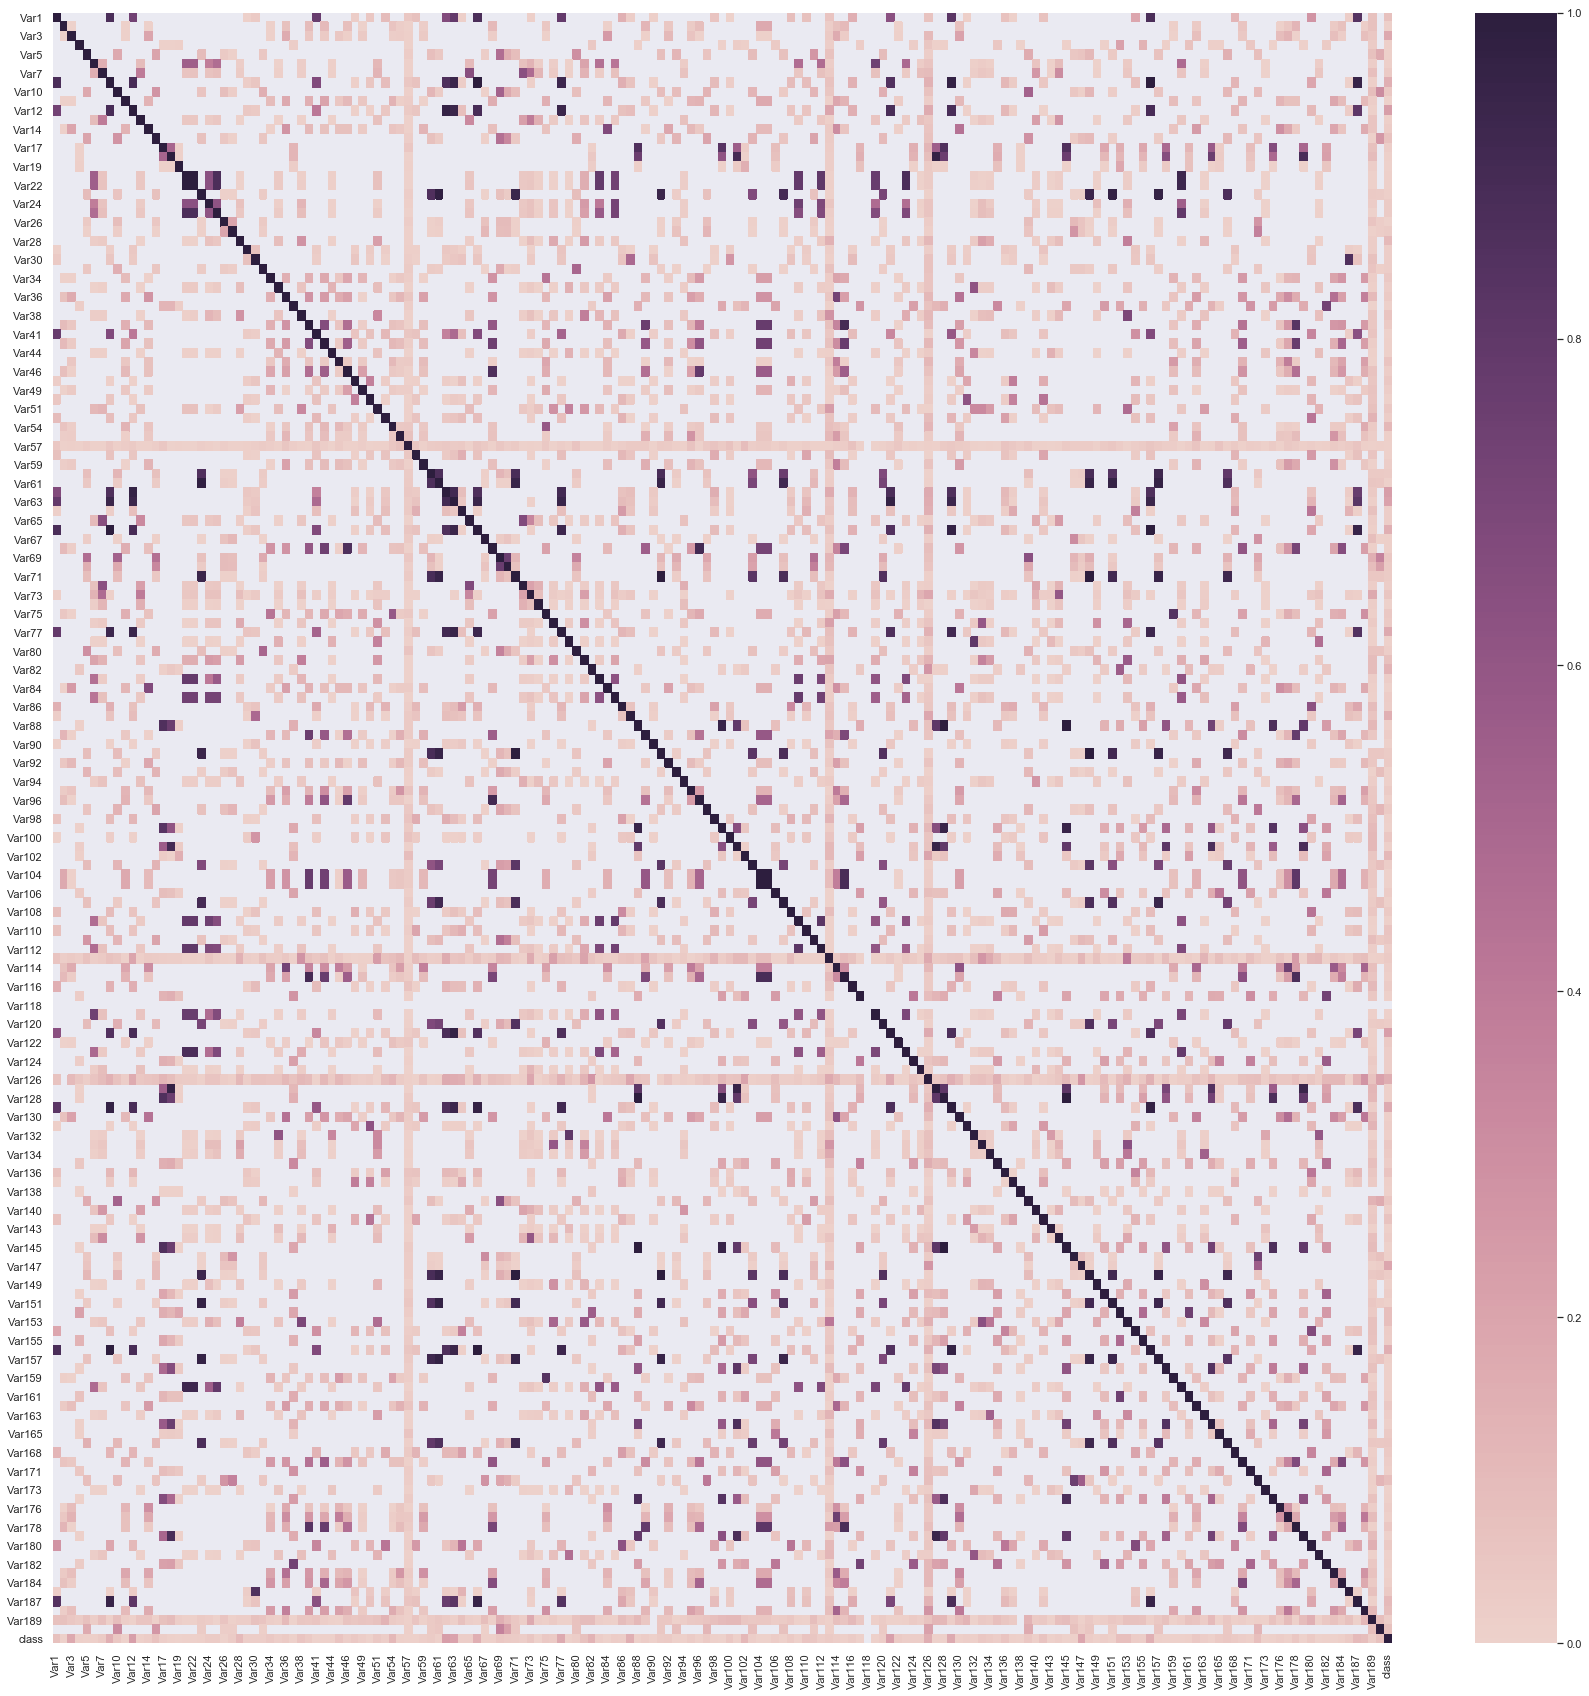

In [18]:
sns.heatmap(data=abs(df), cmap = sns.cubehelix_palette(as_cmap=True))
plt.savefig('output.png', bbox_inches='tight', dpi=100)

In [19]:
abs(df["class"].sort_values(ascending=False))

class     1.000000
Var62     0.233746
Var12     0.227252
Var121    0.224281
Var63     0.208969
Var147    0.187862
Var3      0.177829
Var77     0.174394
Var129    0.174105
Var66     0.156228
Var156    0.156228
Var9      0.149703
Var87     0.148473
Var82     0.133931
Var54     0.113319
Var187    0.101729
Var152    0.081187
Var172    0.078854
Var1      0.076848
Var142    0.062669
Var110    0.058208
Var45     0.054956
Var73     0.052033
Var166    0.048674
Var75     0.039897
Var113    0.037448
Var122    0.035452
Var7      0.034607
Var24     0.030241
Var91     0.029510
            ...   
Var92     0.033907
Var36     0.035427
Var165    0.035636
Var168    0.037503
Var70     0.037612
Var97     0.037870
Var134    0.037948
Var186    0.039067
Var47     0.039200
Var34     0.040128
Var51     0.040147
Var162    0.040666
Var10     0.043685
Var139    0.043795
Var178    0.044344
Var133    0.045657
Var100    0.050162
Var69     0.050730
Var111    0.052673
Var136    0.056960
Var38     0.061540
Var16     0.

In [27]:
def inspect_variation_df(df):
    assert df.shape[0] == df.shape[1]
    threshold = 0.9
    n = df.shape[0]
    varList = []
    col_corr = []
    for i in range(n-1):
        for j in range(i+1, n):
            if df.iloc[i, j] >= threshold:
                varList.append((df.iloc[i, j], df.index[i], df.columns[j]))
                col_corr.append(df.index[i])
                col_corr.append(df.index[j])
    return np.array(varList), pd.Series(col_corr)

In [28]:
varList, col_corr = inspect_variation_df(encoded_x.corr())

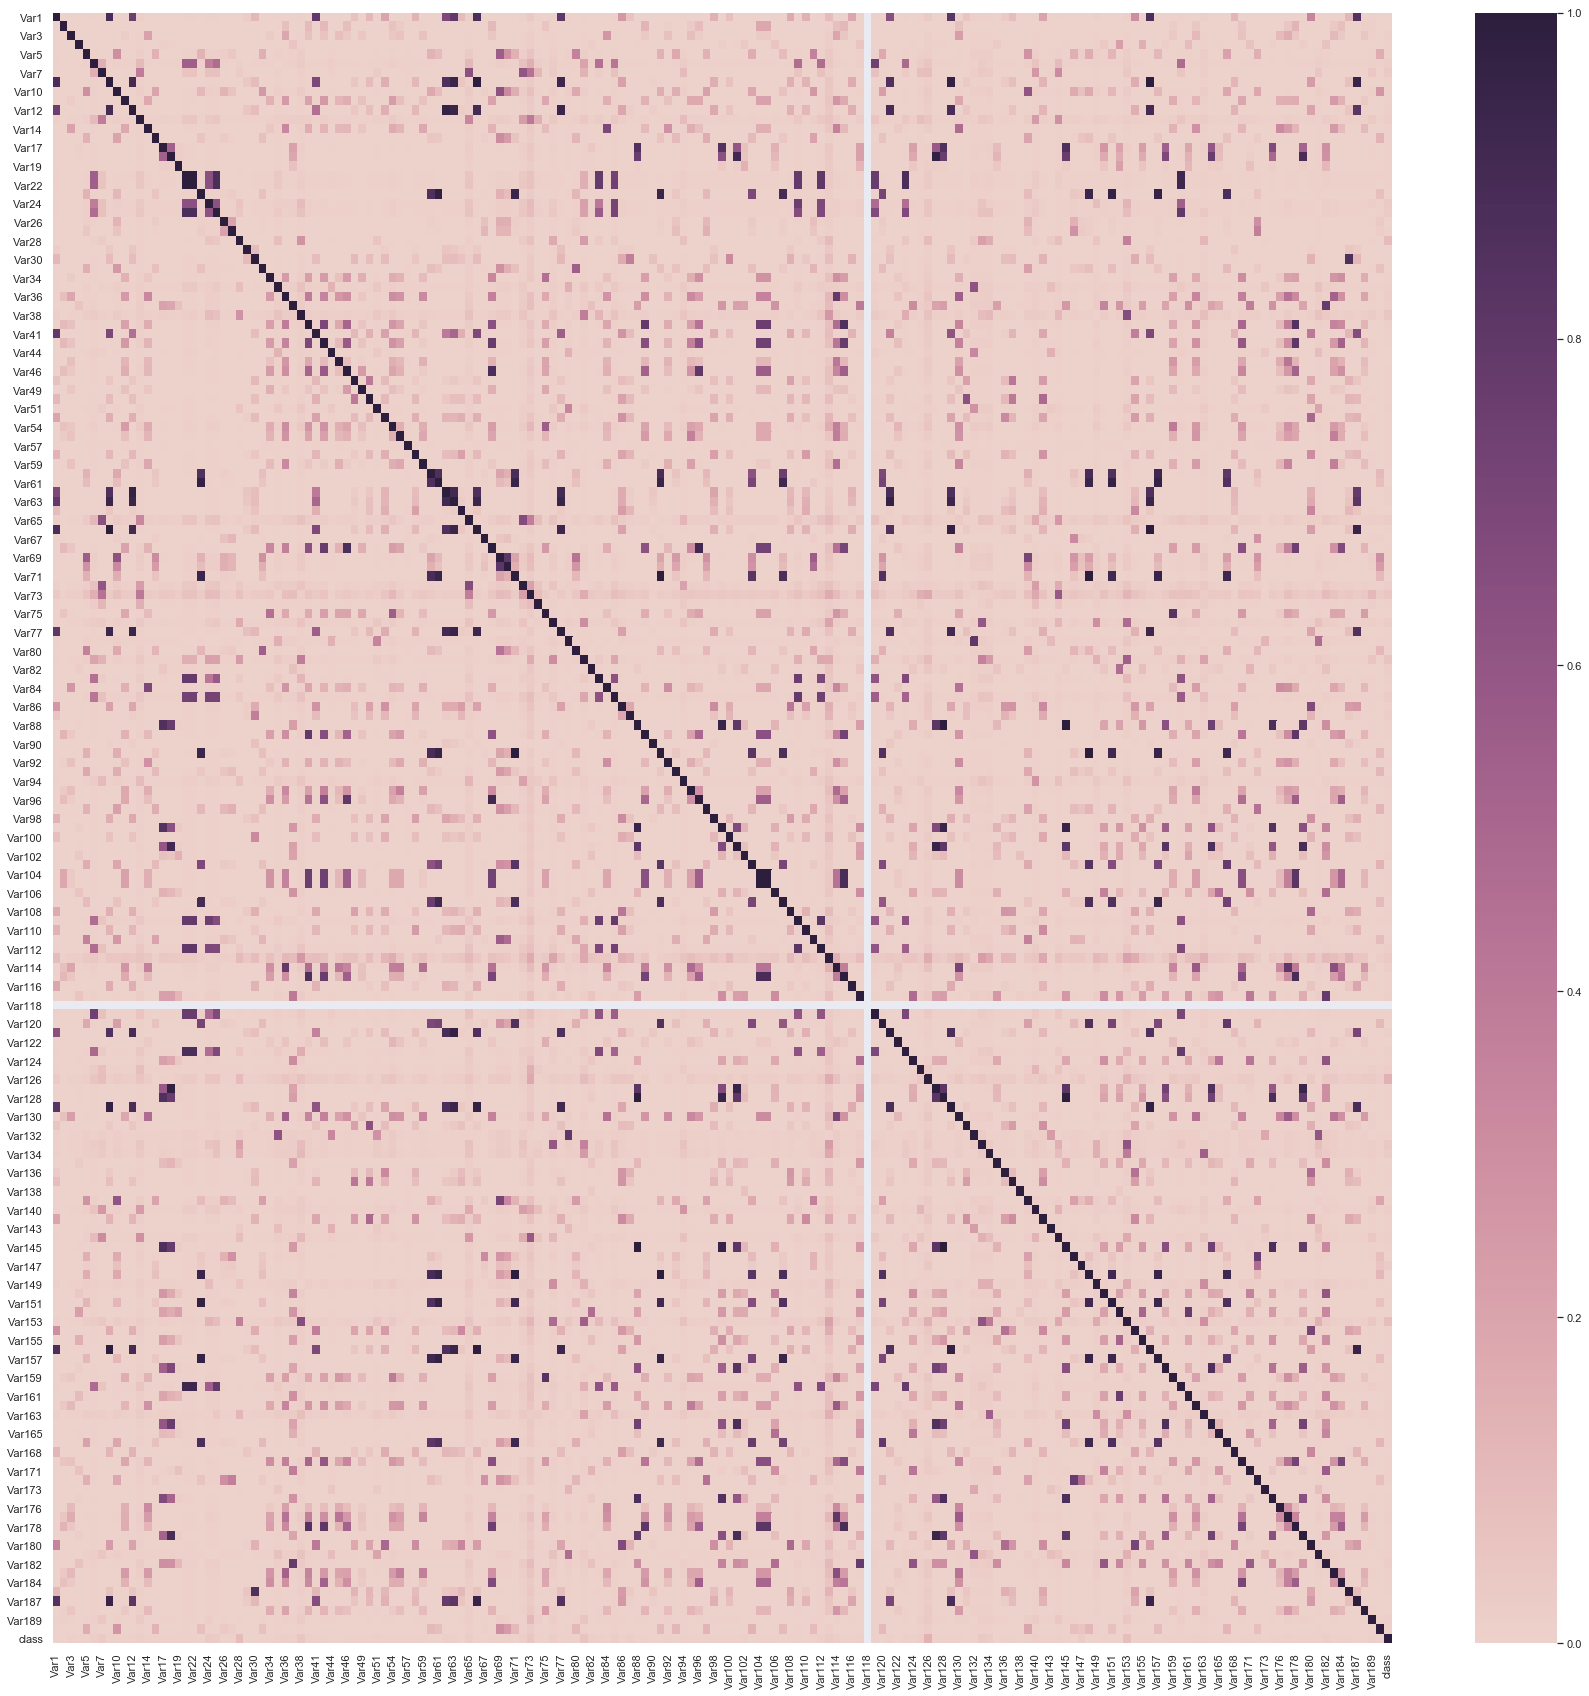

In [29]:
sns.heatmap(data=abs(encoded_x.corr()), cmap = sns.cubehelix_palette(as_cmap=True))
plt.show()

In [30]:
import networkx as nx
import matplotlib.pyplot as plt

c:\program files\python37\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


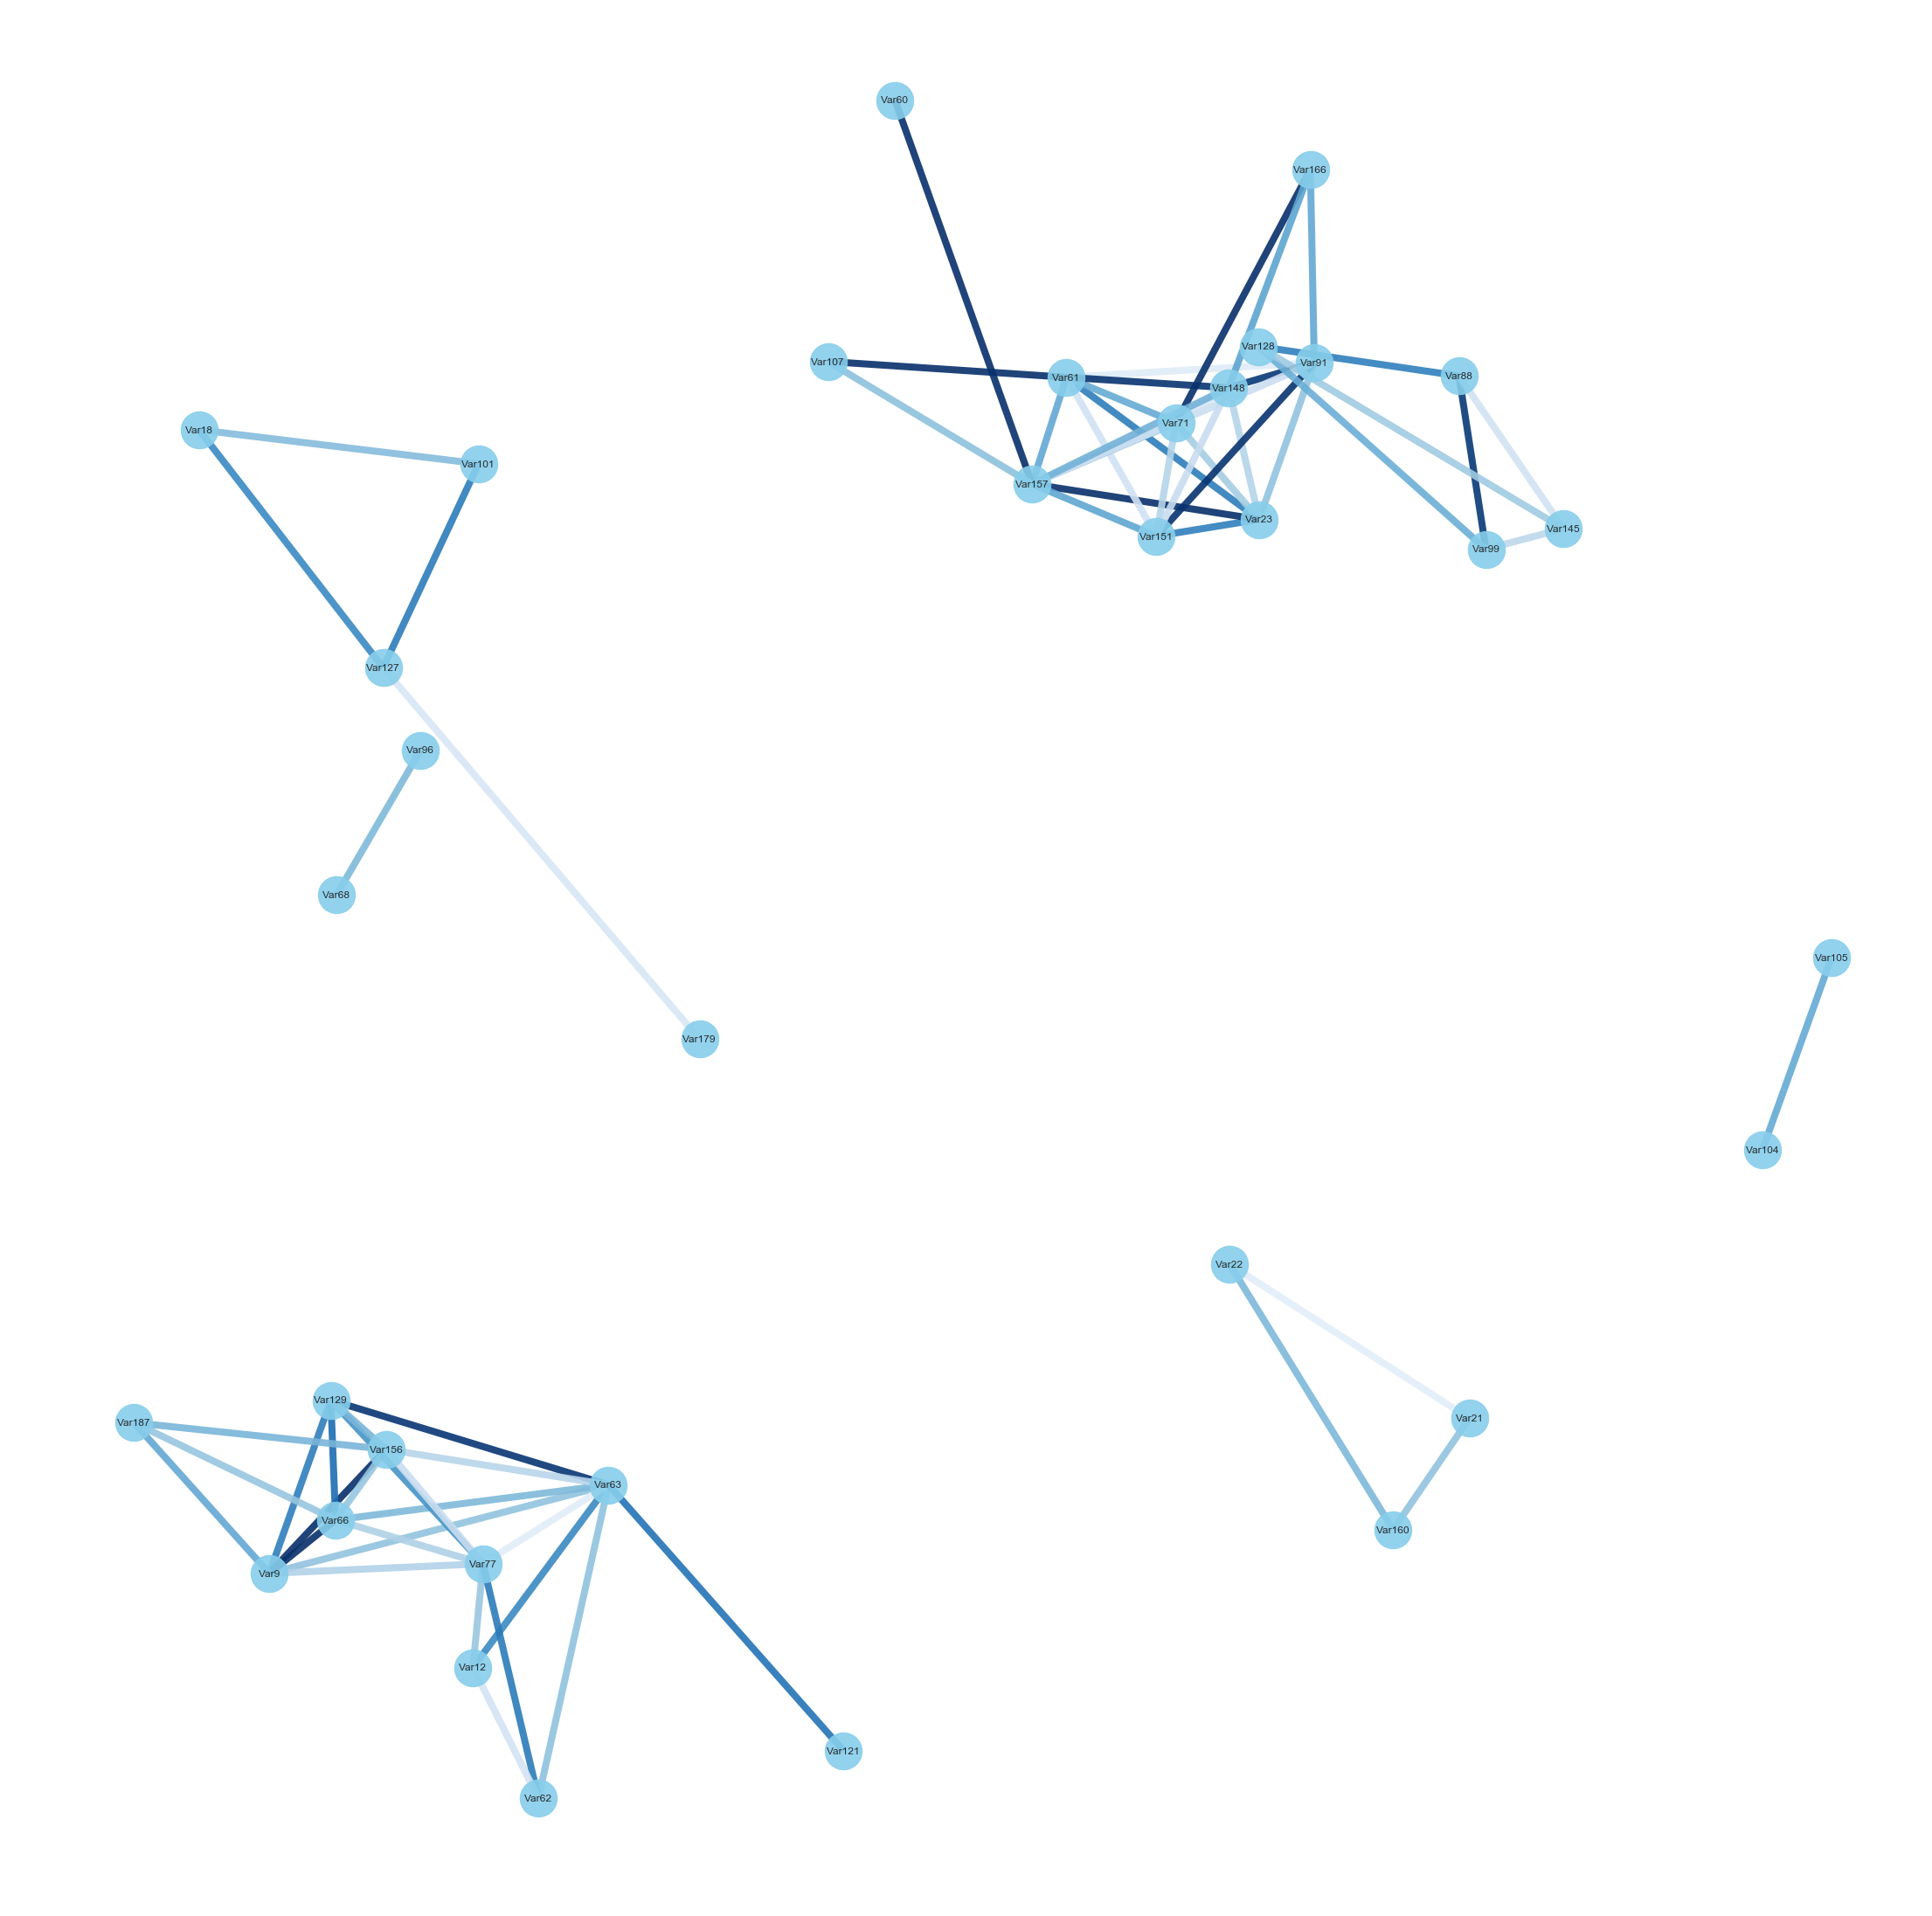

In [31]:
df2 = pd.DataFrame(varList)

G = nx.from_pandas_edgelist(df2, 1, 2, create_using=nx.Graph())
pos = nx.spring_layout(G, k=0.5)

# Custom the nodes:
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1800, width=8, alpha = 0.9, edge_color=df2[0].astype(np.float), 
        edge_cmap=plt.cm.Blues, pos=pos, edge_vmin=0.9, edge_vmax=1)

In [39]:
from sklearn.datasets import load_digits
from sklearn.decomposition import FastICA
X, _ = load_digits(return_X_y=True)
transformer = FastICA(n_components=7,
        random_state=0)
X_transformed = transformer.fit_transform(X)
X_transformed.shape

(1797, 7)

In [ ]:
pd.DataFrame(X_transformed)

In [ ]:
df2

In [ ]:
train_df[["Var127", "Var158"]].corr()

In [ ]:
G.nodes()

In [ ]:
train_df[["Var30", "Var186"]].corr()

In [ ]:
train_df["Var30"].value_counts()

---

### Udział 1 w wypełnionych/niewypełnionych

In [32]:
def check_one_class_distribution(df, columns):
    for column in columns:
        mask = df[column].notna()
        filled_number = df.loc[mask].shape[0]
        ones_in_filled = df.loc[mask].loc[df["class"]==1].shape[0]
        empty_number = df.loc[~mask].shape[0]
        ones_in_empty = df.loc[~mask].loc[df["class"]==1].shape[0]
        if filled_number == 0:
            filled_number = 1
        if empty_number == 0:
            empty_number = 1
        print("{}: {} {}".format(column, ones_in_filled/filled_number, ones_in_empty/empty_number))

In [33]:
check_one_class_distribution(train_df, train_df.columns)

Var1: 0.03163444639718805 0.07387588445639218
Var2: 0.023735810113519093 0.07450488073582537
Var3: 0.023760330578512397 0.0745029719204755
Var4: 0.0277337559429477 0.074758634932108
Var5: 0.059850374064837904 0.07369126478851458
Var6: 0.07785860742072297 0.03616101887650671
Var7: 0.07740720968784243 0.03991834883193468
Var9: 0.03163444639718805 0.07387588445639218
Var10: 0.059850374064837904 0.07369126478851458
Var11: 0.023760330578512397 0.0745029719204755
Var12: 0.033936651583710405 0.07371454573032003
Var13: 0.07740720968784243 0.03991834883193468
Var14: 0.023760330578512397 0.0745029719204755
Var16: 0.059850374064837904 0.07369126478851458
Var17: 0.0277337559429477 0.074758634932108
Var18: 0.0277337559429477 0.074758634932108
Var19: 0.0277337559429477 0.074758634932108
Var21: 0.07785860742072297 0.03616101887650671
Var22: 0.07731199822207406 0.03697227079690232
Var23: 0.059850374064837904 0.07369126478851458
Var24: 0.0786237915826981 0.0414858531504947
Var25: 0.07731199822207406 0.

---

## Budowa modelu

In [ ]:
import sklearn.ensemble

In [ ]:
model = sklearn.ensemble.RandomForestClassifier()

In [ ]:
x = train_df.iloc[:, :-1]
y = train_df.iloc[:, -1]

In [ ]:
x.

In [ ]:
model.fit(x, y)

In [ ]:
import catboost
import lightgbm